<a href="https://colab.research.google.com/github/Arrow2004/credit_risk_predictor/blob/main/hackathon_progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

### Uploading all the cleaned datasets

In [ ]:
# Read the cleaned CSV
df1 = pd.read_csv('/content/application_metadata_cleaned.csv')

# Get column names
print("Column Names:", df1.columns.tolist())

# Show first 5 rows
print(df1.head(5))

Column Names: ['customer_id', 'application_id', 'application_hour', 'application_day_of_week', 'account_open_year', 'preferred_contact', 'referral_code', 'account_status_code', 'random_noise_1', 'num_login_sessions', 'num_customer_service_calls', 'has_mobile_app', 'paperless_billing', 'default']
   customer_id  application_id  application_hour  application_day_of_week  \
0        10000          620515                 5                        6   
1        10001          624978                 4                        2   
2        10002          564658                10                        3   
3        10003          621493                 7                        5   
4        10004          637785                 1                        2   

   account_open_year preferred_contact referral_code account_status_code  \
0               2013              Mail       REF0000               ACT-2   
1               2015             Phone       REF0000               ACT-3   
2           

In [ ]:
# Read the cleaned CSV
df2 = pd.read_csv('/content/credit_history_cleaned.csv')

# Get column names
print("Column Names:", df2.columns.tolist())

# Show first 5 rows
print(df2.head(5))

Column Names: ['customer_id', 'credit_score', 'num_credit_accounts', 'oldest_credit_line_age', 'oldest_account_age_months', 'total_credit_limit', 'num_delinquencies_2yrs', 'num_inquiries_6mo', 'recent_inquiry_count', 'num_public_records', 'num_collections', 'account_diversity_index']
   customer_id  credit_score  num_credit_accounts  oldest_credit_line_age  \
0        10000           696                   14                    22.8   
1        10001           659                   13                     3.5   
2        10002           662                    3                     0.0   
3        10003           676                    8                     9.0   
4        10004           678                    7                     8.0   

   oldest_account_age_months  total_credit_limit  num_delinquencies_2yrs  \
0                      273.6              169100                       0   
1                       42.0               78200                       0   
2                       

In [ ]:
# Read the cleaned CSV
df3 = pd.read_csv('/content/demographics_cleaned.csv')

# Get column names
print("Column Names:", df3.columns.tolist())

# Show first 5 rows
print(df3.head(5))

Column Names: ['customer_id', 'age', 'annual_income', 'employment_length', 'employment_type', 'education', 'marital_status', 'num_dependents']
   customer_id  age  annual_income  employment_length employment_type  \
0        10000   41          61800                2.2       Full Time   
1        10001   38          28600                7.0       Full Time   
2        10002   18          20700                0.8       Full Time   
3        10003   27          31400                4.8       Full Time   
4        10004   26          24600                5.2       Full Time   

     education marital_status  num_dependents  
0     Graduate        Married               2  
1  High School        Married               0  
2     Bachelor         Single               0  
3     Bachelor         Single               0  
4  High School         Single               0  


In [ ]:
# Read the cleaned CSV
df4 = pd.read_csv('/content/financial_ratios_cleaned.csv')

# Get column names
print("Column Names:", df4.columns.tolist())

# Show first 5 rows
print(df4.head(5))

Column Names: ['customer_id', 'monthly_income', 'existing_monthly_debt', 'monthly_payment', 'debt_to_income_ratio', 'debt_service_ratio', 'payment_to_income_ratio', 'credit_utilization', 'revolving_balance', 'credit_usage_amount', 'available_credit', 'total_monthly_debt_payment', 'annual_debt_payment', 'loan_to_annual_income', 'total_debt_amount', 'monthly_free_cash_flow']
   customer_id  monthly_income  existing_monthly_debt  monthly_payment  \
0        10000         5150.00                 738.64           592.13   
1        10001         2383.33                 392.21          1013.86   
2        10002         1725.00                 204.07           317.81   
3        10003         2616.67                 288.71           234.52   
4        10004         2050.00                 248.77           334.81   

   debt_to_income_ratio  debt_service_ratio  payment_to_income_ratio  \
0                 0.258            0.258402                    0.115   
1                 0.590            

In [ ]:
# Read the cleaned CSV
df5 = pd.read_csv('/content/geographic_data_cleaned.csv')

# Get column names
print("Column Names:", df5.columns.tolist())

# Show first 5 rows
print(df5.head(5))

Column Names: ['customer_id', 'state', 'regional_unemployment_rate', 'regional_median_income', 'regional_median_rent', 'housing_price_index', 'cost_of_living_index', 'previous_zip_code']
   customer_id         state  regional_unemployment_rate  \
0        10000          Ohio                         4.8   
1        10001  Pennsylvania                         4.4   
2        10002      Virginia                         3.9   
3        10003    California                         5.8   
4        10004    Washington                         5.8   

   regional_median_income  regional_median_rent  housing_price_index  \
0                   56000                1380.0                 91.0   
1                   61000                1510.0                 92.0   
2                   74000                1920.0                125.0   
3                   75000                1690.0                158.0   
4                   78000                1700.0                152.0   

   cost_of_living_i

In [ ]:
# Read the cleaned CSV
df6 = pd.read_csv('/content/cleaned_loan_data.csv')

# Get column names
print("Column Names:", df6.columns.tolist())

# Show first 5 rows
print(df6.head(5))

Column Names: ['customer_id', 'loan_type', 'loan_amount', 'loan_term', 'interest_rate', 'loan_purpose', 'loan_to_value_ratio', 'origination_channel', 'loan_officer_id', 'marketing_campaign']
   customer_id loan_type  loan_amount  loan_term  interest_rate  \
0        10000  personal      17700.0         36          12.50   
1        10001  mortgage     114000.0        180           6.83   
2        10002  personal       9300.0         36          13.99   
3        10003  personal       8700.0         48          13.26   
4        10004  personal       7200.0         24          10.77   

         loan_purpose  loan_to_value_ratio origination_channel  \
0  Debt Consolidation                0.000         Direct Mail   
1           Refinance                0.774              Branch   
2      Major Purchase                0.000              Online   
3             Medical                0.000              Online   
4  Debt Consolidation                0.000              Branch   

   loan_o

### Box-Plots and Checking the outliers

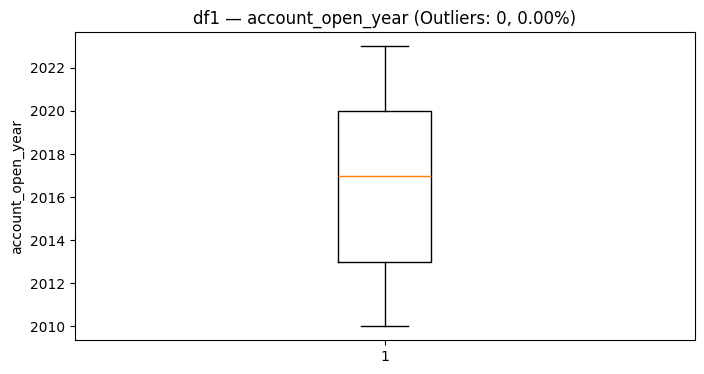

df1 · account_open_year → outliers = 0, 0.00% of non-null


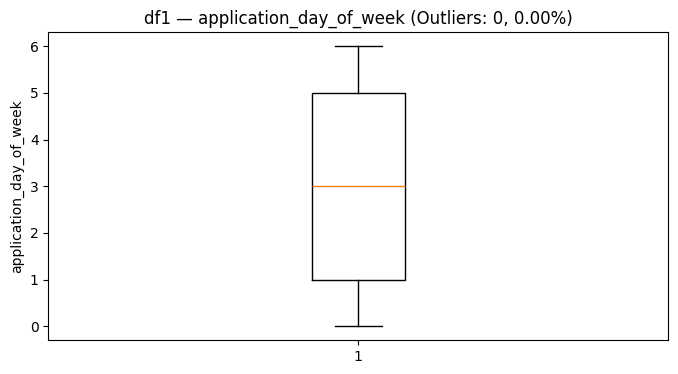

df1 · application_day_of_week → outliers = 0, 0.00% of non-null


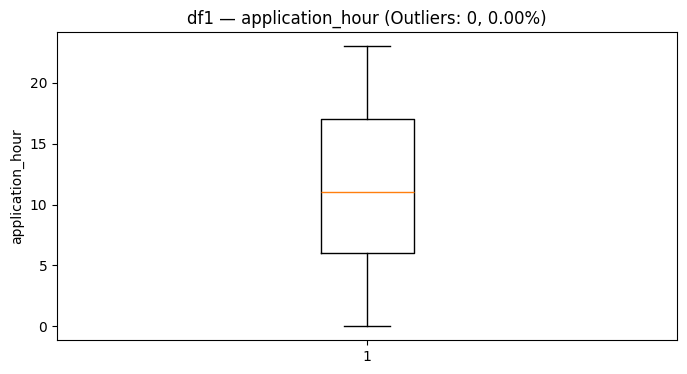

df1 · application_hour → outliers = 0, 0.00% of non-null


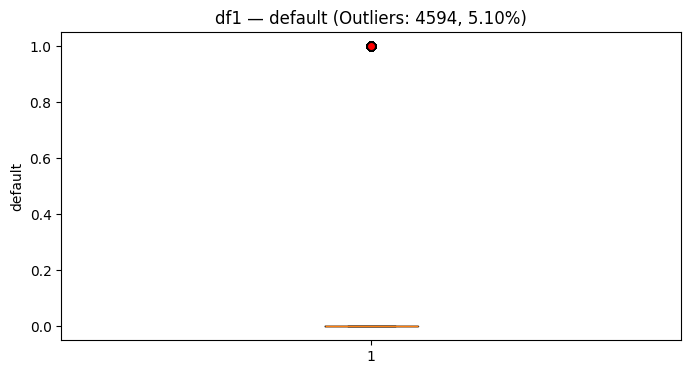

df1 · default → outliers = 4594, 5.10% of non-null


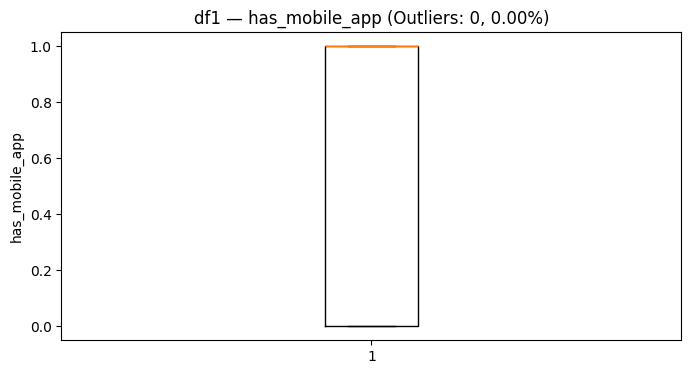

df1 · has_mobile_app → outliers = 0, 0.00% of non-null


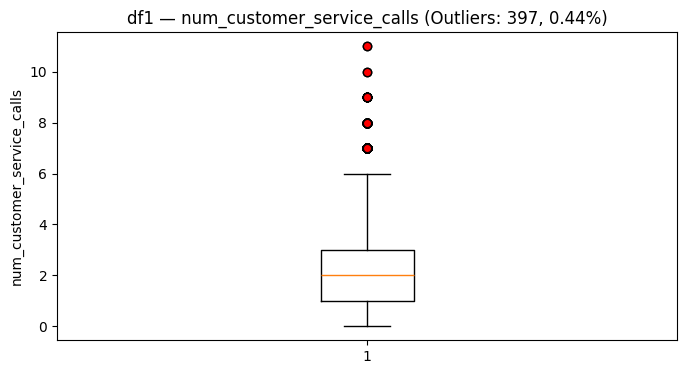

df1 · num_customer_service_calls → outliers = 397, 0.44% of non-null


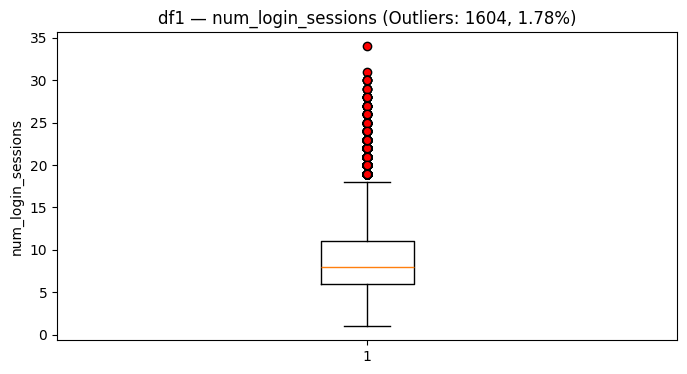

df1 · num_login_sessions → outliers = 1604, 1.78% of non-null


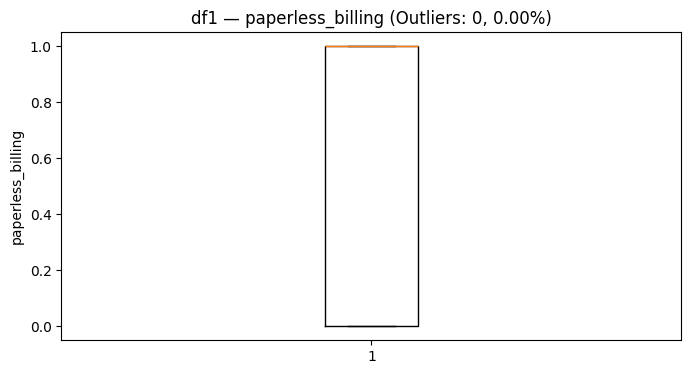

df1 · paperless_billing → outliers = 0, 0.00% of non-null


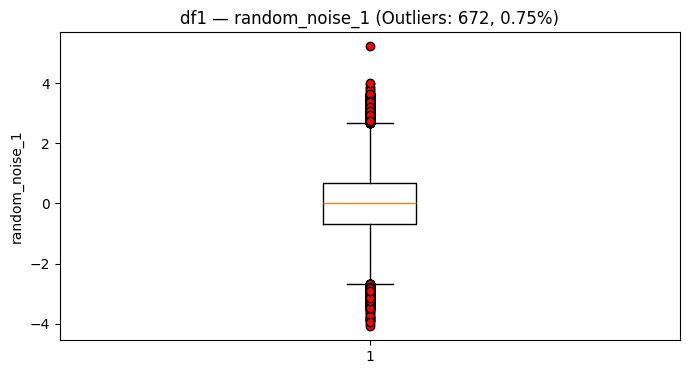

df1 · random_noise_1 → outliers = 672, 0.75% of non-null


In [ ]:
skip_cols = [col for col in df1.columns if col.endswith('_id') or 'id' in col.lower()]
numeric_cols = df1.select_dtypes(include='number').columns.difference(skip_cols)

for col in numeric_cols:
  Q1 = df1[col].quantile(0.25)
  Q3 = df1[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)][col]
  outlier_count = len(outliers)
  total = df1[col].dropna().shape[0]
  outlier_pct = (outlier_count / total) * 100 if total > 0 else 0
  plt.figure(figsize=(8,4))
  plt.boxplot(df1[col], flierprops=dict(marker='o', markerfacecolor='red', markersize=6))
  plt.title(f'df1 — {col} (Outliers: {outlier_count}, {outlier_pct:.2f}%)')
  plt.ylabel(col)
  plt.show()

  print(f"df1 · {col} → outliers = {outlier_count}, {outlier_pct:.2f}% of non-null")


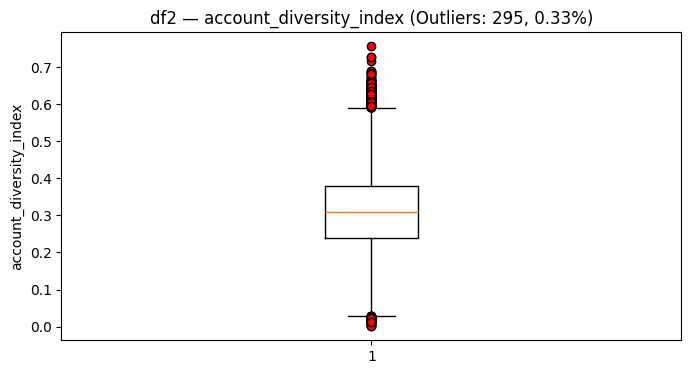

df2 · account_diversity_index → outliers = 295, 0.33% of non-null


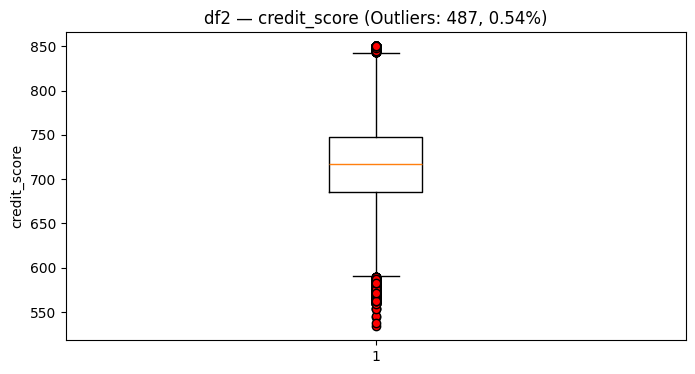

df2 · credit_score → outliers = 487, 0.54% of non-null


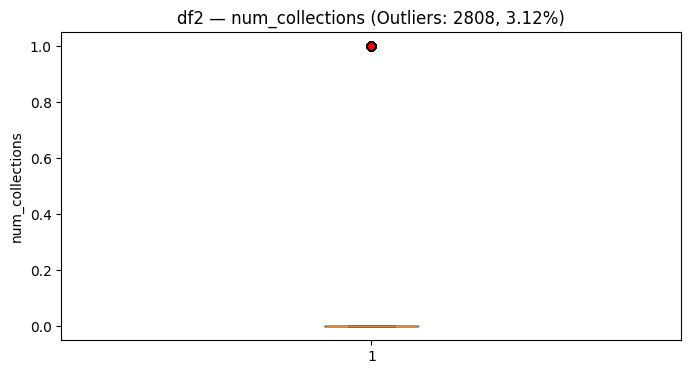

df2 · num_collections → outliers = 2808, 3.12% of non-null


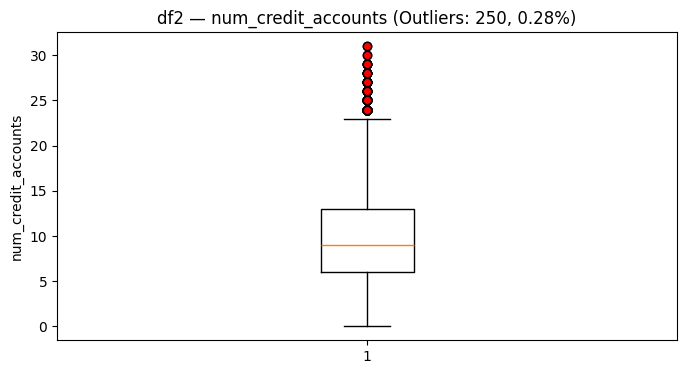

df2 · num_credit_accounts → outliers = 250, 0.28% of non-null


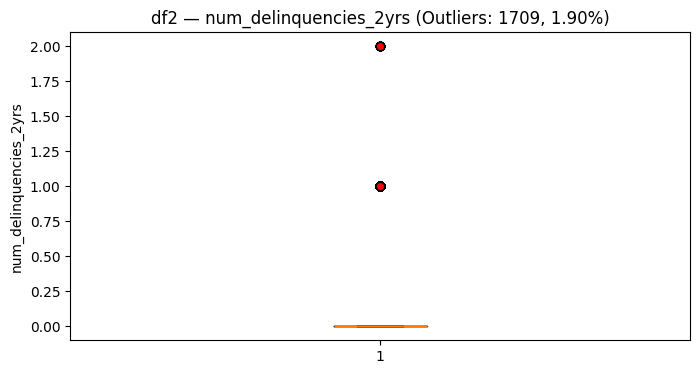

df2 · num_delinquencies_2yrs → outliers = 1709, 1.90% of non-null


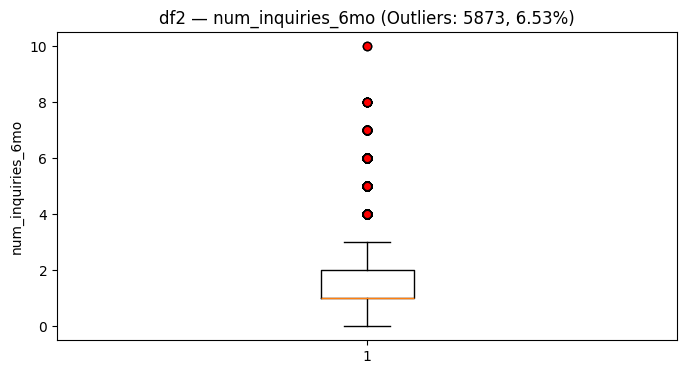

df2 · num_inquiries_6mo → outliers = 5873, 6.53% of non-null


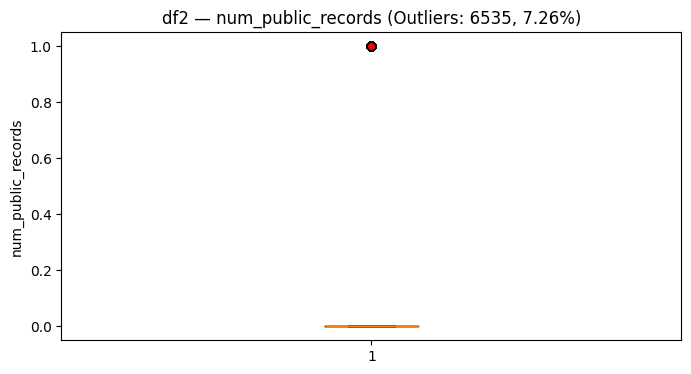

df2 · num_public_records → outliers = 6535, 7.26% of non-null


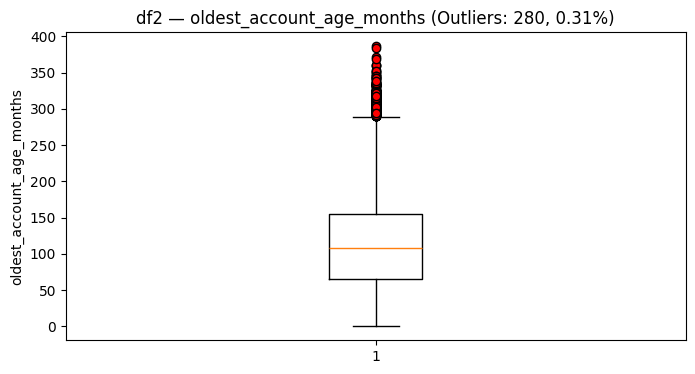

df2 · oldest_account_age_months → outliers = 280, 0.31% of non-null


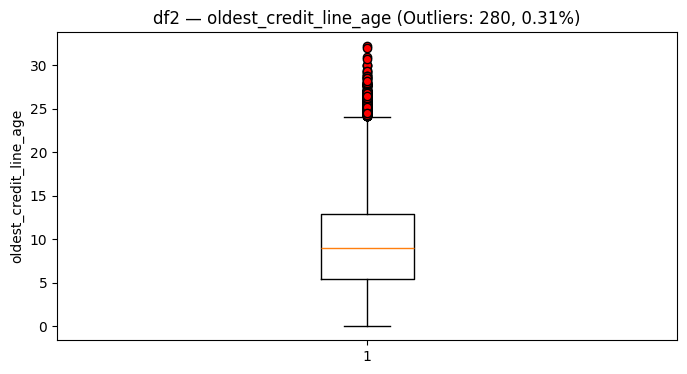

df2 · oldest_credit_line_age → outliers = 280, 0.31% of non-null


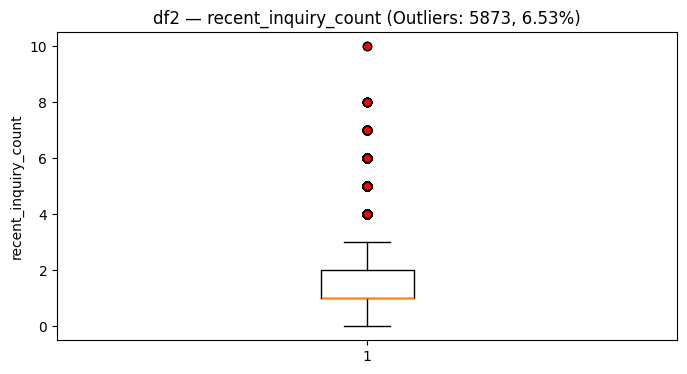

df2 · recent_inquiry_count → outliers = 5873, 6.53% of non-null


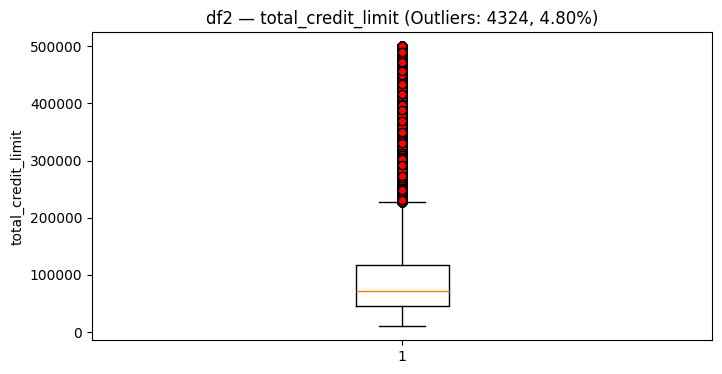

df2 · total_credit_limit → outliers = 4324, 4.80% of non-null


In [ ]:
skip_cols = [col for col in df2.columns if col.endswith('_id') or 'id' in col.lower()]
numeric_cols = df2.select_dtypes(include='number').columns.difference(skip_cols)

for col in numeric_cols:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)][col]
    outlier_count = len(outliers)
    total = df2[col].dropna().shape[0]
    outlier_pct = (outlier_count / total) * 100 if total > 0 else 0
    plt.figure(figsize=(8,4))
    plt.boxplot(df2[col], flierprops=dict(marker='o', markerfacecolor='red', markersize=6))
    plt.title(f'df2 — {col} (Outliers: {outlier_count}, {outlier_pct:.2f}%)')
    plt.ylabel(col)
    plt.show()

    print(f"df2 · {col} → outliers = {outlier_count}, {outlier_pct:.2f}% of non-null")


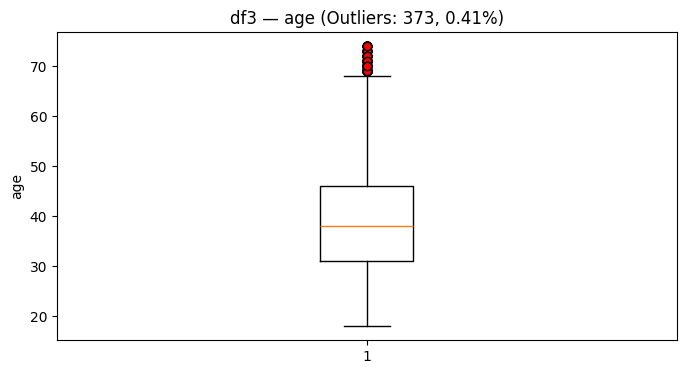

df3 · age → outliers = 373, 0.41% of non-null


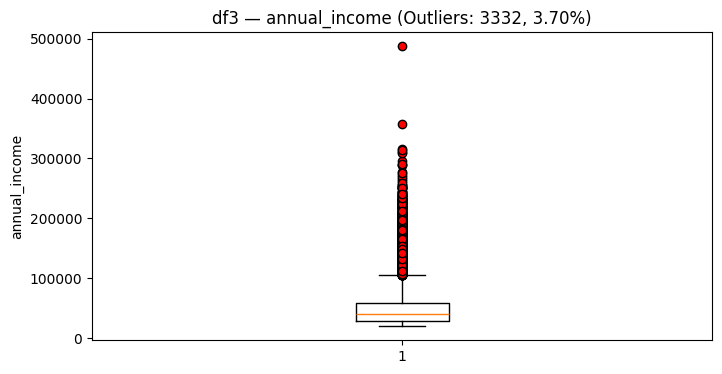

df3 · annual_income → outliers = 3332, 3.70% of non-null


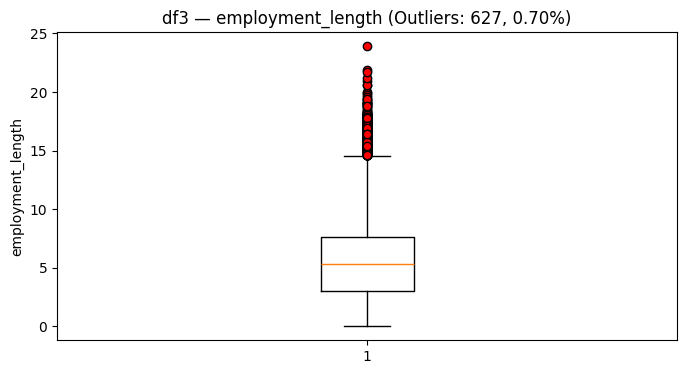

df3 · employment_length → outliers = 627, 0.70% of non-null


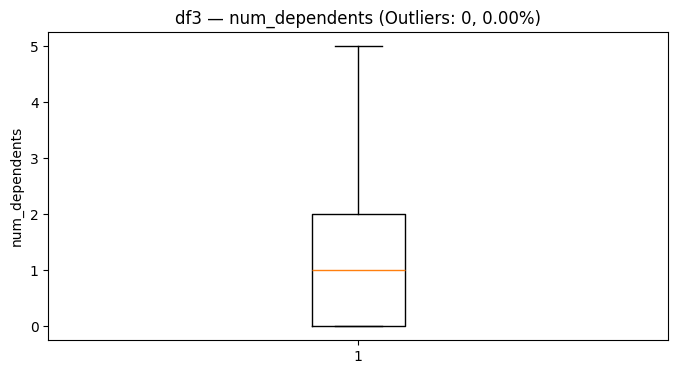

df3 · num_dependents → outliers = 0, 0.00% of non-null


In [ ]:
skip_cols = [col for col in df3.columns if col.endswith('_id') or 'id' in col.lower()]
numeric_cols = df3.select_dtypes(include='number').columns.difference(skip_cols)

for col in numeric_cols:
  Q1 = df3[col].quantile(0.25)
  Q3 = df3[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df3[(df3[col] < lower_bound) | (df3[col] > upper_bound)][col]
  outlier_count = len(outliers)
  total = df3[col].dropna().shape[0]
  outlier_pct = (outlier_count / total) * 100 if total > 0 else 0

  plt.figure(figsize=(8,4))
  plt.boxplot(df3[col], flierprops=dict(marker='o', markerfacecolor='red', markersize=6))
  plt.title(f'df3 — {col} (Outliers: {outlier_count}, {outlier_pct:.2f}%)')
  plt.ylabel(col)
  plt.show()

  print(f"df3 · {col} → outliers = {outlier_count}, {outlier_pct:.2f}% of non-null")


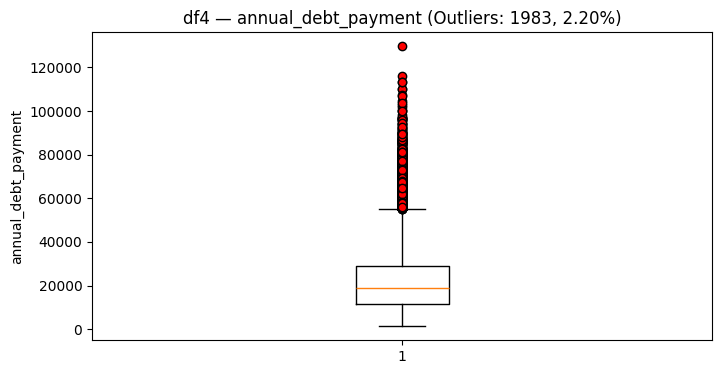

df4 · annual_debt_payment → outliers = 1983, 2.20% of non-null


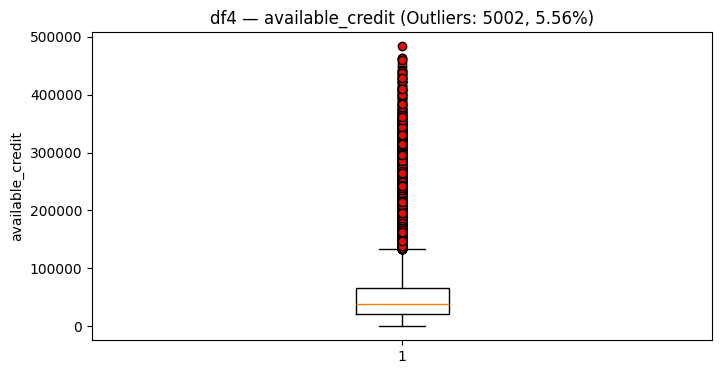

df4 · available_credit → outliers = 5002, 5.56% of non-null


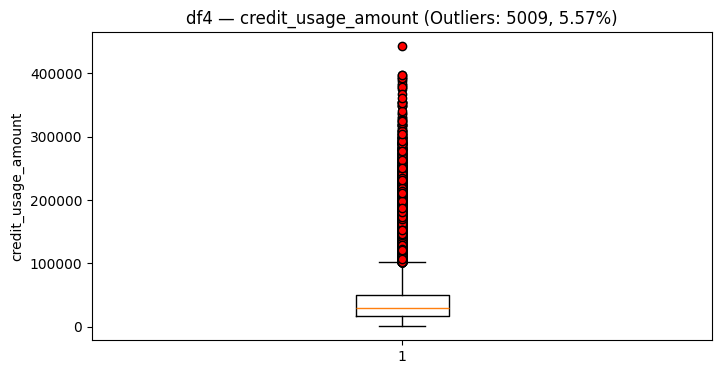

df4 · credit_usage_amount → outliers = 5009, 5.57% of non-null


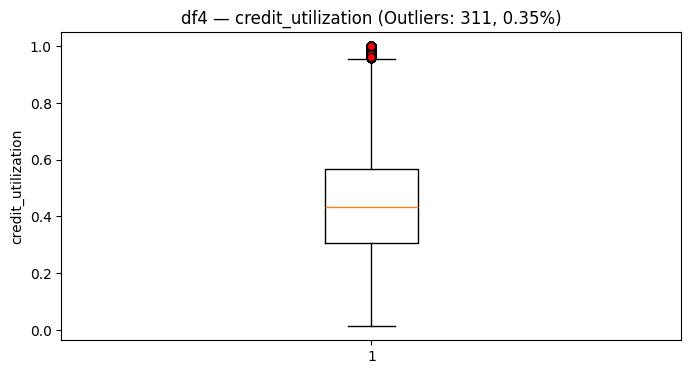

df4 · credit_utilization → outliers = 311, 0.35% of non-null


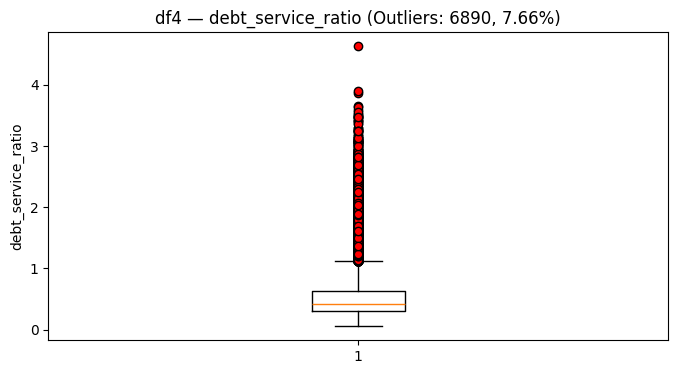

df4 · debt_service_ratio → outliers = 6890, 7.66% of non-null


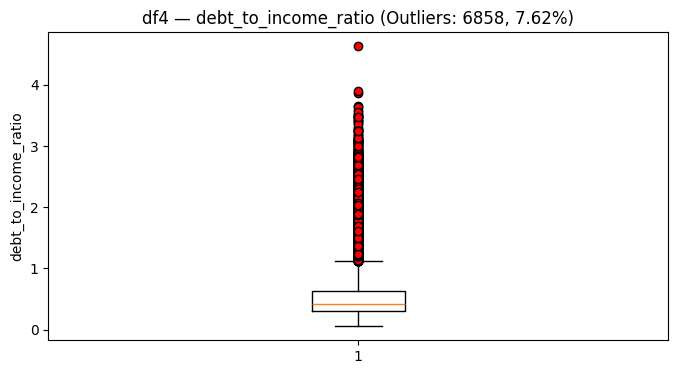

df4 · debt_to_income_ratio → outliers = 6858, 7.62% of non-null


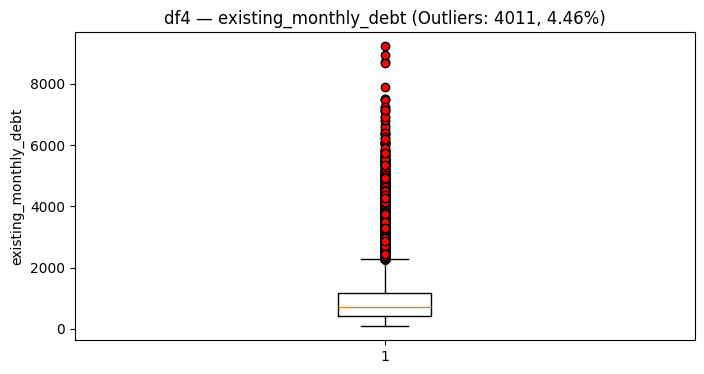

df4 · existing_monthly_debt → outliers = 4011, 4.46% of non-null


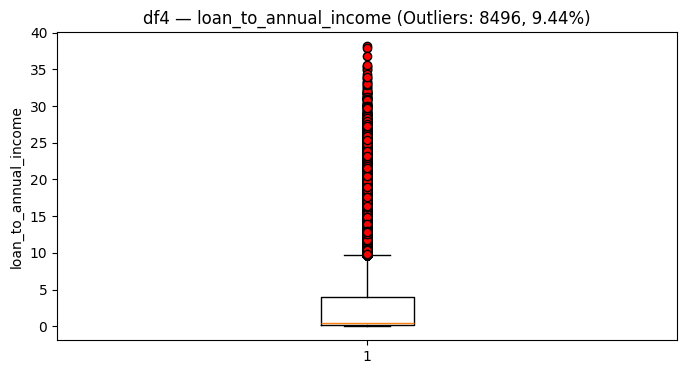

df4 · loan_to_annual_income → outliers = 8496, 9.44% of non-null


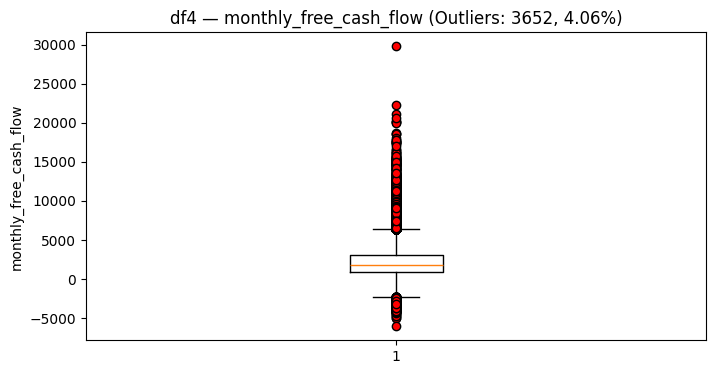

df4 · monthly_free_cash_flow → outliers = 3652, 4.06% of non-null


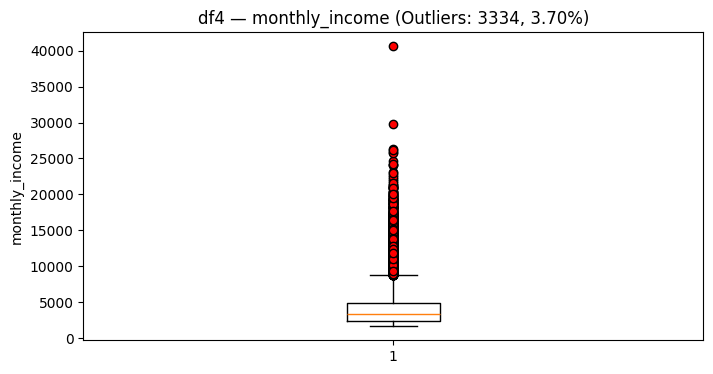

df4 · monthly_income → outliers = 3334, 3.70% of non-null


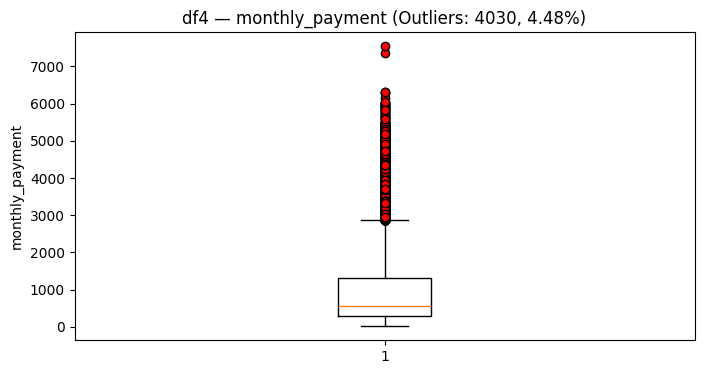

df4 · monthly_payment → outliers = 4030, 4.48% of non-null


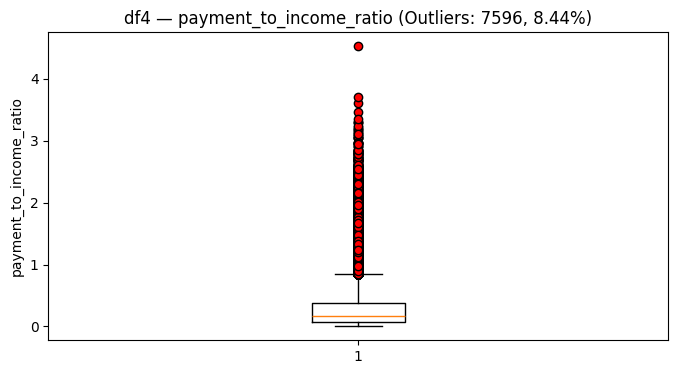

df4 · payment_to_income_ratio → outliers = 7596, 8.44% of non-null


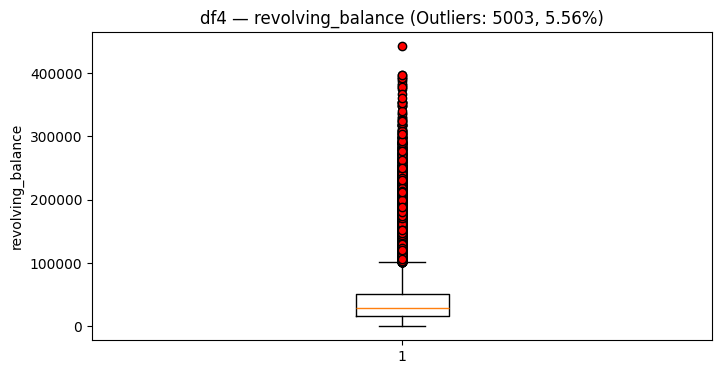

df4 · revolving_balance → outliers = 5003, 5.56% of non-null


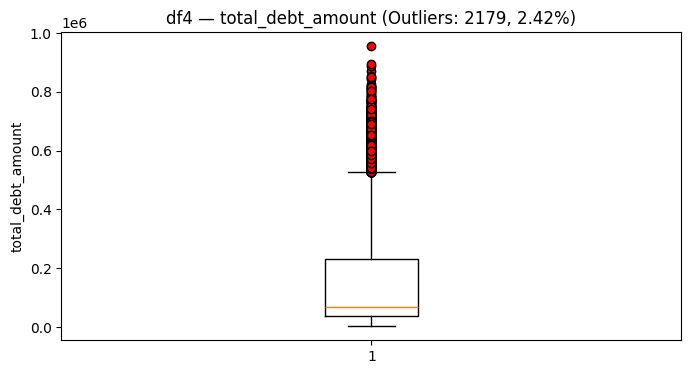

df4 · total_debt_amount → outliers = 2179, 2.42% of non-null


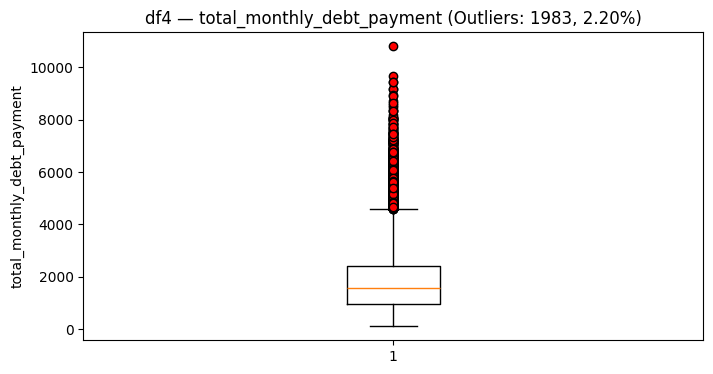

df4 · total_monthly_debt_payment → outliers = 1983, 2.20% of non-null


In [ ]:
skip_cols = [col for col in df4.columns if col.endswith('_id') or 'id' in col.lower()]
numeric_cols = df4.select_dtypes(include='number').columns.difference(skip_cols)

for col in numeric_cols:
  Q1 = df4[col].quantile(0.25)
  Q3 = df4[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df4[(df4[col] < lower_bound) | (df4[col] > upper_bound)][col]
  outlier_count = len(outliers)
  total = df4[col].dropna().shape[0]
  outlier_pct = (outlier_count / total) * 100 if total > 0 else 0

  plt.figure(figsize=(8,4))
  plt.boxplot(df4[col], flierprops=dict(marker='o', markerfacecolor='red', markersize=6))
  plt.title(f'df4 — {col} (Outliers: {outlier_count}, {outlier_pct:.2f}%)')
  plt.ylabel(col)
  plt.show()

  print(f"df4 · {col} → outliers = {outlier_count}, {outlier_pct:.2f}% of non-null")


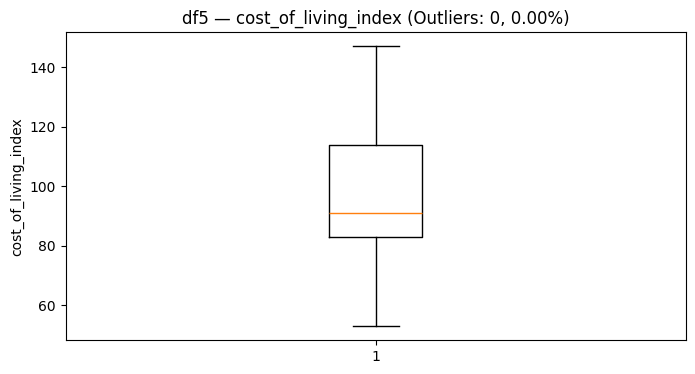

df5 · cost_of_living_index → outliers = 0, 0.00% of non-null


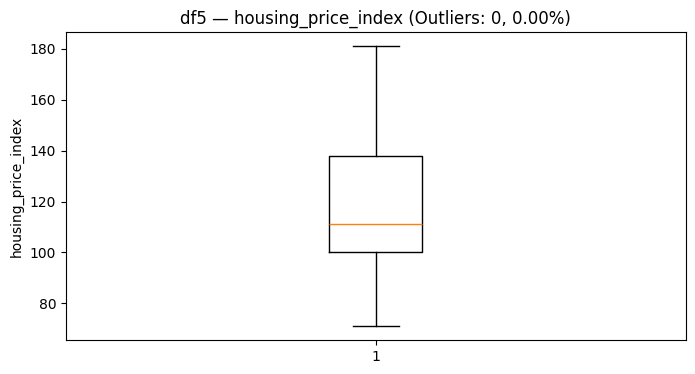

df5 · housing_price_index → outliers = 0, 0.00% of non-null


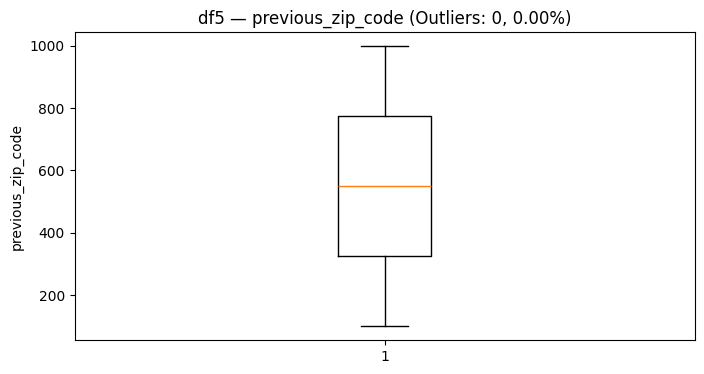

df5 · previous_zip_code → outliers = 0, 0.00% of non-null


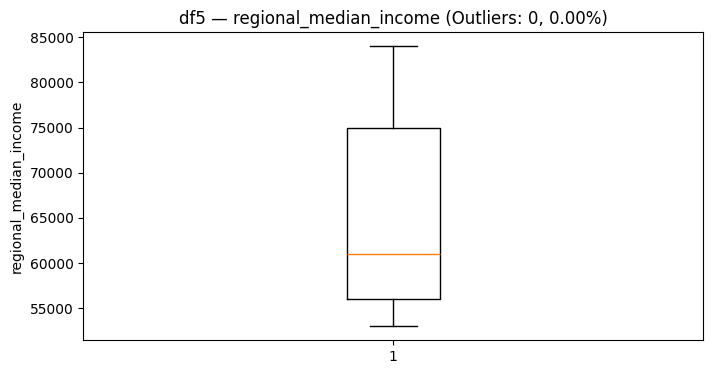

df5 · regional_median_income → outliers = 0, 0.00% of non-null


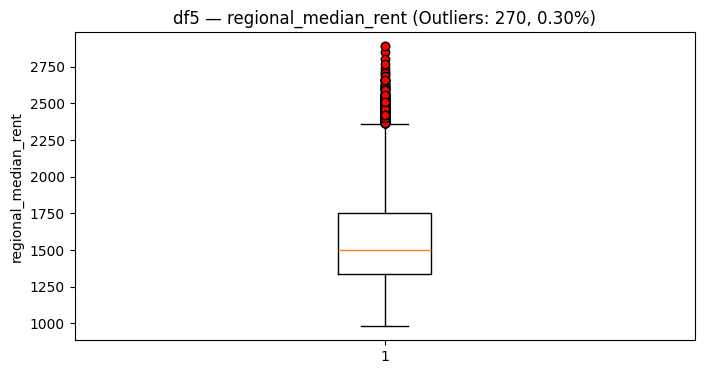

df5 · regional_median_rent → outliers = 270, 0.30% of non-null


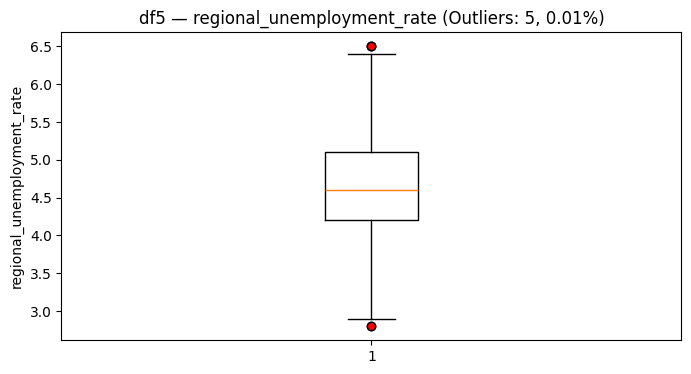

df5 · regional_unemployment_rate → outliers = 5, 0.01% of non-null


In [ ]:
skip_cols = [col for col in df5.columns if col.endswith('_id') or 'id' in col.lower()]
numeric_cols = df5.select_dtypes(include='number').columns.difference(skip_cols)

for col in numeric_cols:
  Q1 = df5[col].quantile(0.25)
  Q3 = df5[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df5[(df5[col] < lower_bound) | (df5[col] > upper_bound)][col]
  outlier_count = len(outliers)
  total = df5[col].dropna().shape[0]
  outlier_pct = (outlier_count / total) * 100 if total > 0 else 0

  plt.figure(figsize=(8,4))
  plt.boxplot(df5[col], flierprops=dict(marker='o', markerfacecolor='red', markersize=6))
  plt.title(f'df5 — {col} (Outliers: {outlier_count}, {outlier_pct:.2f}%)')
  plt.ylabel(col)
  plt.show()

  print(f"df5 · {col} → outliers = {outlier_count}, {outlier_pct:.2f}% of non-null")


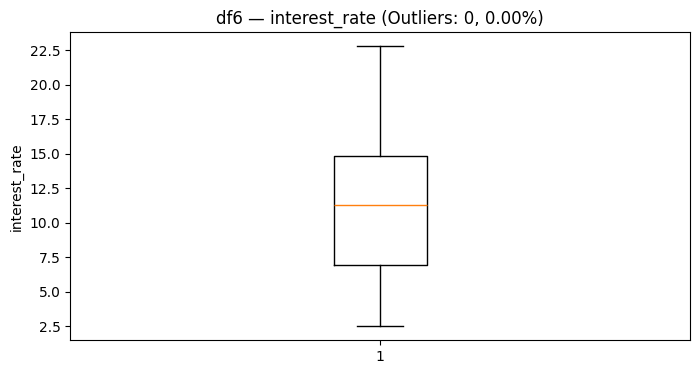

df6 · interest_rate → outliers = 0, 0.00% of non-null


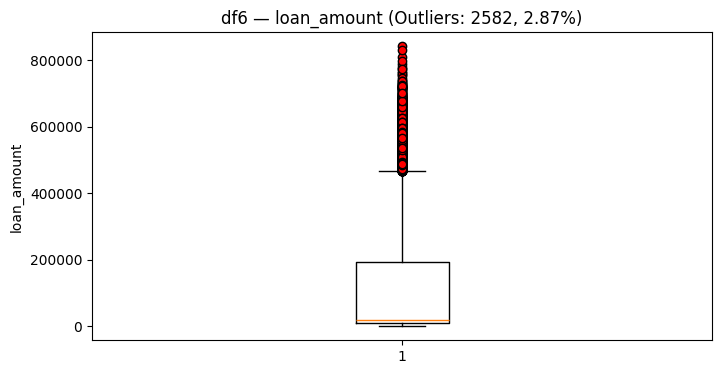

df6 · loan_amount → outliers = 2582, 2.87% of non-null


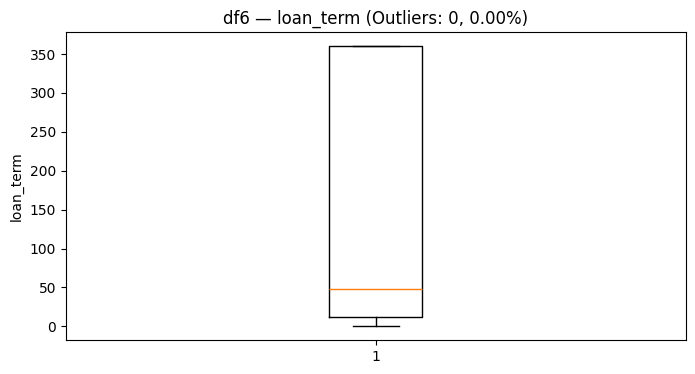

df6 · loan_term → outliers = 0, 0.00% of non-null


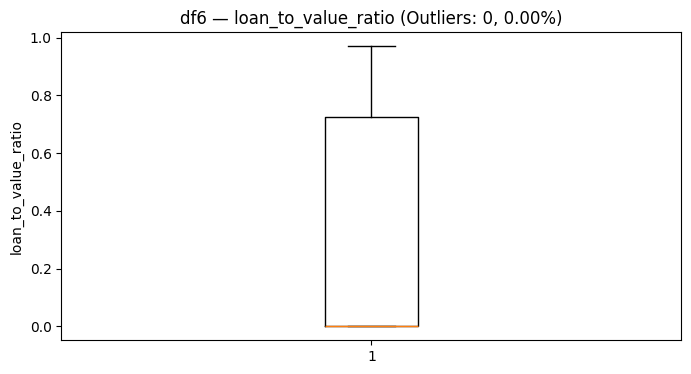

df6 · loan_to_value_ratio → outliers = 0, 0.00% of non-null


In [ ]:
skip_cols = [col for col in df6.columns if col.endswith('_id') or 'id' in col.lower()]
numeric_cols = df6.select_dtypes(include='number').columns.difference(skip_cols)

for col in numeric_cols:
  Q1 = df6[col].quantile(0.25)
  Q3 = df6[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df6[(df6[col] < lower_bound) | (df6[col] > upper_bound)][col]
  outlier_count = len(outliers)
  total = df6[col].dropna().shape[0]
  outlier_pct = (outlier_count / total) * 100 if total > 0 else 0

  plt.figure(figsize=(8,4))
  plt.boxplot(df6[col], flierprops=dict(marker='o', markerfacecolor='red', markersize=6))
  plt.title(f'df6 — {col} (Outliers: {outlier_count}, {outlier_pct:.2f}%)')
  plt.ylabel(col)
  plt.show()

  print(f"df6 · {col} → outliers = {outlier_count}, {outlier_pct:.2f}% of non-null")


### Merging

In [ ]:
merged_df = df2.merge(df3, on='customer_id', how='outer') \
              .merge(df4, on='customer_id', how='outer') \
              .merge(df5, on='customer_id', how='outer') \
              .merge(df6, on='customer_id', how='outer')
merged_df

,customer_id,credit_score,num_credit_accounts,oldest_credit_line_age,oldest_account_age_months,total_credit_limit,num_delinquencies_2yrs,num_inquiries_6mo,recent_inquiry_count,num_public_records,...,previous_zip_code,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,origination_channel,loan_officer_id,marketing_campaign
0,10000,696,14,22.8,273.6,169100,0,2,2,1,...,451,personal,17700.0,36,12.50,Debt Consolidation,0.000,Direct Mail,1045,W
1,10001,659,13,3.5,42.0,78200,0,6,6,0,...,537,mortgage,114000.0,180,6.83,Refinance,0.774,Branch,1011,B
2,10002,662,3,0.0,0.0,41400,0,2,2,0,...,679,personal,9300.0,36,13.99,Major Purchase,0.000,Online,1084,K
3,10003,676,8,9.0,108.0,60000,0,1,1,0,...,719,personal,8700.0,48,13.26,Medical,0.000,Online,1048,A
4,10004,678,7,8.0,96.0,49700,0,1,1,0,...,933,personal,7200.0,24,10.77,Debt Consolidation,0.000,Branch,1055,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89994,99994,817,10,8.2,98.4,135600,0,1,1,0,...,933,personal,11300.0,24,9.70,Home Improvement,0.000,Branch,1050,O
89995,99995,745,9,8.8,105.6,44600,0,1,1,0,...,536,personal,16500.0,36,11.67,Other,0.000,Branch,1071,D
89996,99996,607,11,1.0,12.0,18300,0,2,2,1,...,193,personal,17800.0,36,14.99,Major Purchase,0.000,Online,1046,J
89997,99997,678,10,3.0,36.0,54300,0,3,3,0,...,555,creditcard,11700.0,0,19.10,Revolving Credit,0.000,Branch,997,K


In [ ]:
merged_df.describe()

,customer_id,credit_score,num_credit_accounts,oldest_credit_line_age,oldest_account_age_months,total_credit_limit,num_delinquencies_2yrs,num_inquiries_6mo,recent_inquiry_count,num_public_records,...,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code,loan_amount,loan_term,interest_rate,loan_to_value_ratio,loan_officer_id
count,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,...,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000
mean,54999.000000,716.281681,9.400016,9.344400,112.132806,91483.424260,0.019145,1.495183,1.495183,0.072612,...,64892.532139,1555.238169,119.074945,97.393438,549.216347,105977.991978,132.369204,11.278835,0.273598,1045.791587
std,25980.617776,46.076985,4.769961,5.111351,61.336214,67988.308788,0.138165,1.225129,1.225129,0.259500,...,9599.130086,267.739999,23.488459,17.994275,259.677610,147111.296259,152.657187,4.607331,0.378284,32.327924
min,10000.000000,534.000000,0.000000,0.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,...,53000.000000,980.000000,71.000000,53.000000,100.000000,500.000000,0.000000,2.500000,0.000000,995.000000
25%,32499.500000,685.000000,6.000000,5.400000,64.800000,45100.000000,0.000000,1.000000,1.000000,0.000000,...,56000.000000,1340.000000,100.000000,83.000000,324.000000,9800.000000,12.000000,6.960000,0.000000,1010.000000
50%,54999.000000,717.000000,9.000000,9.000000,108.000000,72300.000000,0.000000,1.000000,1.000000,0.000000,...,61000.000000,1500.000000,111.000000,91.000000,550.000000,19200.000000,48.000000,11.290000,0.000000,1048.000000
75%,77498.500000,748.000000,13.000000,12.900000,154.800000,117800.000000,0.000000,2.000000,2.000000,0.000000,...,75000.000000,1750.000000,138.000000,114.000000,775.000000,192800.000000,360.000000,14.820000,0.725000,1077.000000
max,99998.000000,850.000000,31.000000,32.200000,386.400000,500000.000000,2.000000,10.000000,10.000000,1.000000,...,84000.000000,2890.000000,181.000000,147.000000,998.000000,841300.000000,360.000000,22.800000,0.970000,1099.000000


In [ ]:
merged_df.columns

Index(['customer_id', 'credit_score', 'num_credit_accounts',
       'oldest_credit_line_age', 'oldest_account_age_months',
       'total_credit_limit', 'num_delinquencies_2yrs', 'num_inquiries_6mo',
       'recent_inquiry_count', 'num_public_records', 'num_collections',
       'account_diversity_index', 'age', 'annual_income', 'employment_length',
       'employment_type', 'education', 'marital_status', 'num_dependents',
       'monthly_income', 'existing_monthly_debt', 'monthly_payment',
       'debt_to_income_ratio', 'debt_service_ratio', 'payment_to_income_ratio',
       'credit_utilization', 'revolving_balance', 'credit_usage_amount',
       'available_credit', 'total_monthly_debt_payment', 'annual_debt_payment',
       'loan_to_annual_income', 'total_debt_amount', 'monthly_free_cash_flow',
       'state', 'regional_unemployment_rate', 'regional_median_income',
       'regional_median_rent', 'housing_price_index', 'cost_of_living_index',
       'previous_zip_code', 'loan_type', 'lo

                            customer_id  credit_score  num_credit_accounts  \
customer_id                    1.000000      0.000129            -0.000295   
credit_score                   0.000129      1.000000             0.155356   
num_credit_accounts           -0.000295      0.155356             1.000000   
oldest_credit_line_age         0.006345      0.185223             0.115283   
oldest_account_age_months      0.006345      0.185223             0.115283   
total_credit_limit            -0.001449      0.433007             0.055683   
num_delinquencies_2yrs        -0.001056     -0.041053            -0.004977   
num_inquiries_6mo              0.002241     -0.001033             0.005135   
recent_inquiry_count           0.002241     -0.001033             0.005135   
num_public_records             0.000083     -0.031638            -0.005082   
num_collections               -0.000299     -0.000255            -0.000030   
account_diversity_index        0.002398      0.183878           

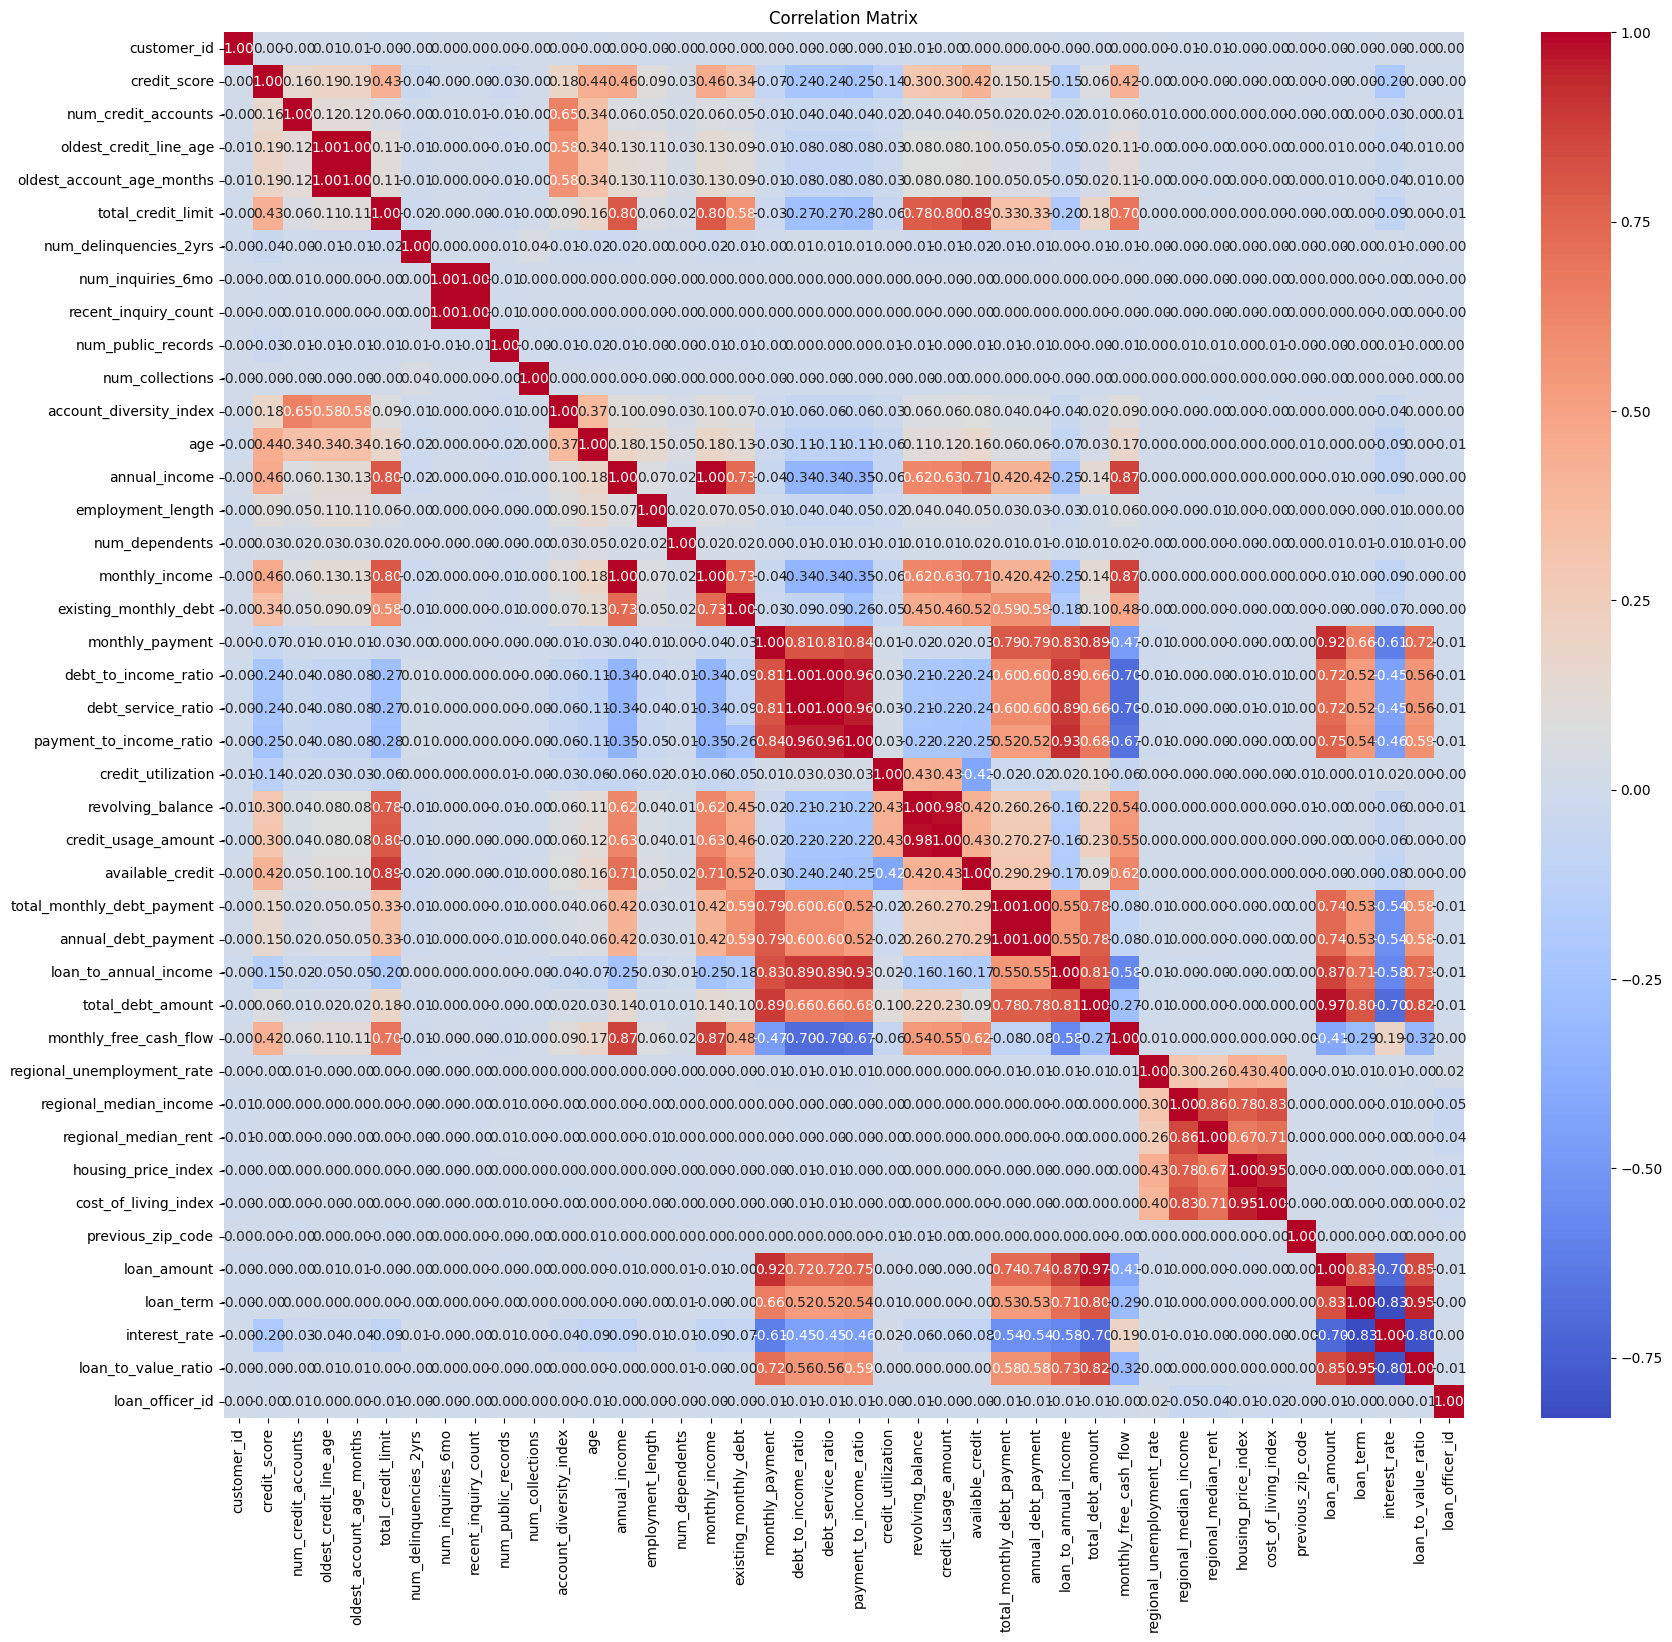

In [ ]:
numeric_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns


# Korrelatsiya matrisi
corr_matrix = merged_df[numeric_cols].corr()


# Natijani ko'rish
print(corr_matrix)

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 18))  # kattaroq figura 54 column uchun
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Columns to drop, updating for matching names in your list
cols_to_drop = [
    'loan_officer_id',
    'previous_zip_code',
    'num_dependents',
    'employment_length',
    'num_delinquencies_2yrs',
    'num_collections',
    'num_public_records',
    'num_inquiries_6mo',
    'recent_inquiry_count'
]

# Drop the columns (errors='ignore' means it won't throw if the name isn't found)
new_merged = merged_df.drop(columns=cols_to_drop, errors='ignore')

# Verify the drop
print("New shape:", new_merged.shape)
print("Remaining columns:", new_merged.columns.tolist())

# Save the cleaned/trimmed DataFrame
new_merged.to_csv('new_merged_dropped.csv', index=False)



New shape: (89999, 41)
Remaining columns: ['customer_id', 'credit_score', 'num_credit_accounts', 'oldest_credit_line_age', 'oldest_account_age_months', 'total_credit_limit', 'account_diversity_index', 'age', 'annual_income', 'employment_type', 'education', 'marital_status', 'monthly_income', 'existing_monthly_debt', 'monthly_payment', 'debt_to_income_ratio', 'debt_service_ratio', 'payment_to_income_ratio', 'credit_utilization', 'revolving_balance', 'credit_usage_amount', 'available_credit', 'total_monthly_debt_payment', 'annual_debt_payment', 'loan_to_annual_income', 'total_debt_amount', 'monthly_free_cash_flow', 'state', 'regional_unemployment_rate', 'regional_median_income', 'regional_median_rent', 'housing_price_index', 'cost_of_living_index', 'loan_type', 'loan_amount', 'loan_term', 'interest_rate', 'loan_purpose', 'loan_to_value_ratio', 'origination_channel', 'marketing_campaign']


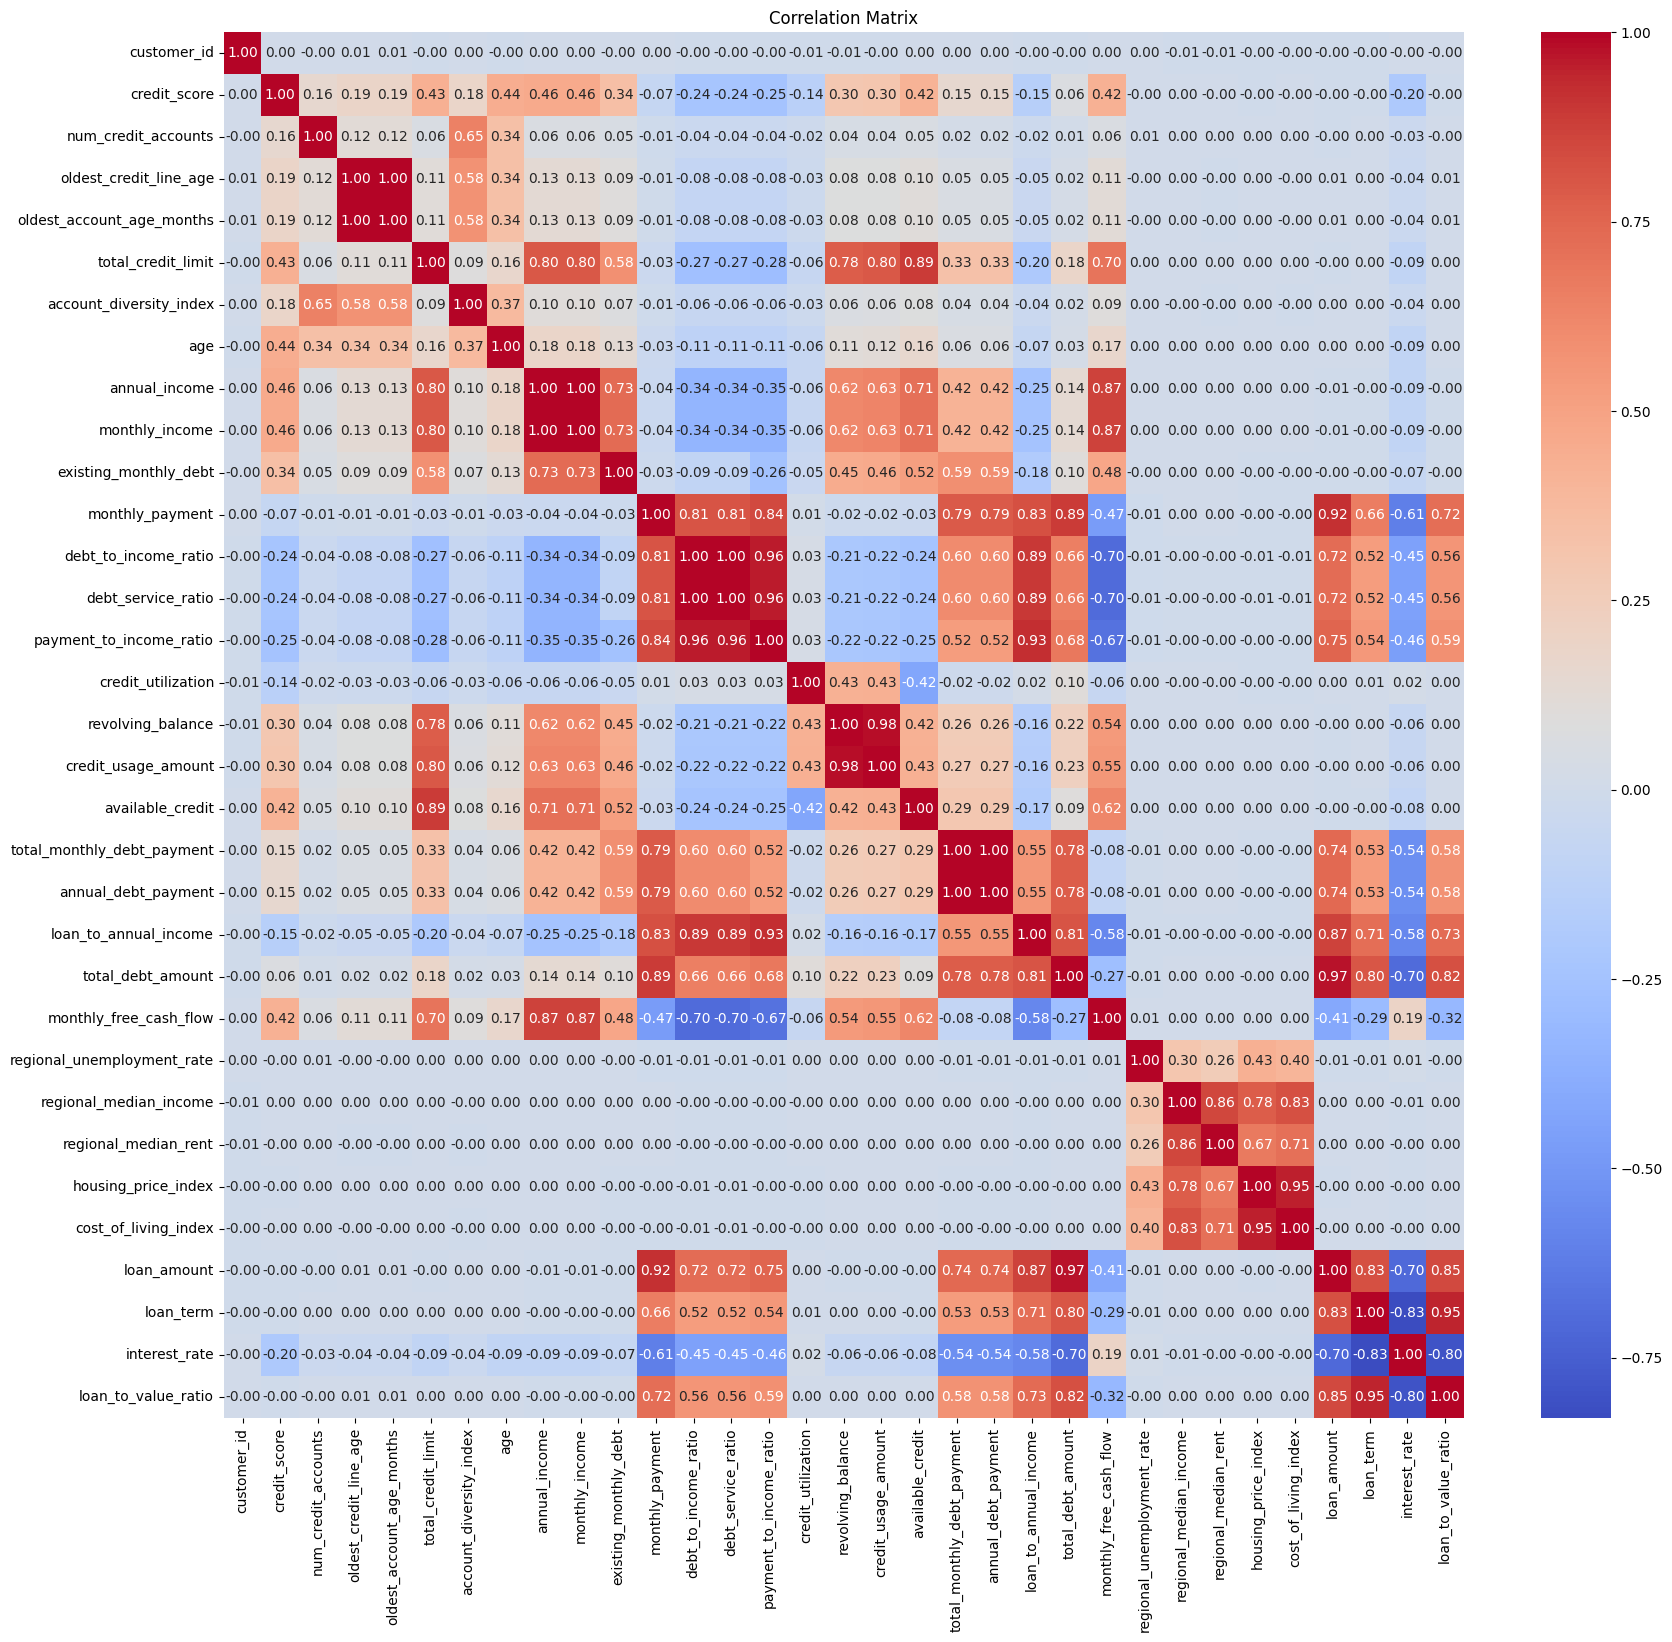

In [ ]:
numeric_cols = new_merged.select_dtypes(include=['int64', 'float64']).columns


# Korrelatsiya matrisi
corr_matrix = new_merged[numeric_cols].corr()



import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 18))  # kattaroq figura 54 column uchun
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
new_merged.to_csv('final.csv',index=False)